# load library

In [1]:
source("r/jupyter_common.R")

source("r/enrichment_analysis.R")
source("r/find_markers.R")
source("r/identify_cell_types.R")

source("r/plot_sc_clusters.R")


In [2]:
# data structure
suppressPackageStartupMessages(library(data.table))

# scRNA-seq
suppressPackageStartupMessages(library(Seurat))


# parameters

In [3]:
cancer_type <- "male-bc_er+bc-epi"

args <- list()
args$cancer_type <- cancer_type
args$method_to_identify_cell_types <- "singler_blueprint_encode"
args$seurat_resolution <- 0.2
args$harmony_theta <- 0

#str_column_of_meta_data_cluster <- "RNA_snn_res.0.7"
str_column_of_meta_data_cluster <- sprintf("RNA_snn_res.%g", args$seurat_resolution)
str_column_of_meta_data_harmony <- sprintf("RNA_harmony_th.%s", paste(args$harmony_theta, collapse=","))

str_reduction <- "pca"
str_umap_reduction <- "umap"  
col_cluster_types <- "cluster.type"

if (args$harmony_theta >= 0) {
    str_column_of_meta_data_cluster <- str_column_of_meta_data_harmony
    str_reduction <- "harmony"
    str_umap_reduction <- "umapharmony"
    col_cluster_types <- "cluster.type.harmony"
}

str_condition <- cancer_type

str_condition
str_column_of_meta_data_cluster
str_umap_reduction
col_cluster_types

figure_format <- "pdf"


[1] "male-bc_er+bc-epi"

[1] "RNA_harmony_th.0"

[1] "umapharmony"

[1] "cluster.type.harmony"

## set.seed

In [4]:
# set seed for reproducibility
set.seed(51)



## display

In [5]:
options(repr.matrix.max.cols=150, repr.matrix.max.rows=50)



# read scRNA-seq

In [6]:
dir_rna <- "/home/hkim77/francolab.w/sc-rna-seq/male-bc/run-20220725"
fname_rna <- sprintf("%s/output_male-bc/rds_er+bc/male-bc-epi_sc-rna-seq_merged_seurat_obj.rds", dir_rna)

rna <- readRDS(fname_rna)



https://mojaveazure.github.io/seurat-object/reference/Seurat-methods.html

dim: The number of features (nrow) and cells (ncol) for the default assay; note: while the number of features changes depending on the active assay, the number of cells remains the same across all assays


## list_sort

In [7]:
list_sort <- sort_cluster_members(rna, args,
                    col_cluster_types = col_cluster_types,
                    str_umap_reduction = str_umap_reduction,
                    f_merge_immune_cell = FALSE)


Sample,Epi. Tumor
<chr>,<int>
446B7L,1647
4CC61L,2648
ER_MH0001,2089
ER_MH0025,2073
ER_MH0029-7C,1804
ER_MH0032,78
ER_MH0040,3258
ER_MH0042,1187
ER_MH0043_T,2114


Sample
<chr>
446B7L
4CC61L
ER_MH0001
ER_MH0025
ER_MH0029-7C
ER_MH0032
ER_MH0040
ER_MH0042
ER_MH0043_T


Sample,Epi. Tumor
<chr>,<int>
446B7L,1647
4CC61L,2648
ER_MH0001,2089
ER_MH0025,2073
ER_MH0029-7C,1804
ER_MH0032,78
ER_MH0040,3258
ER_MH0042,1187
ER_MH0043_T,2114


## colors

### samples

[1] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C" "#FDBF6F"
 [8] "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928" "gold"

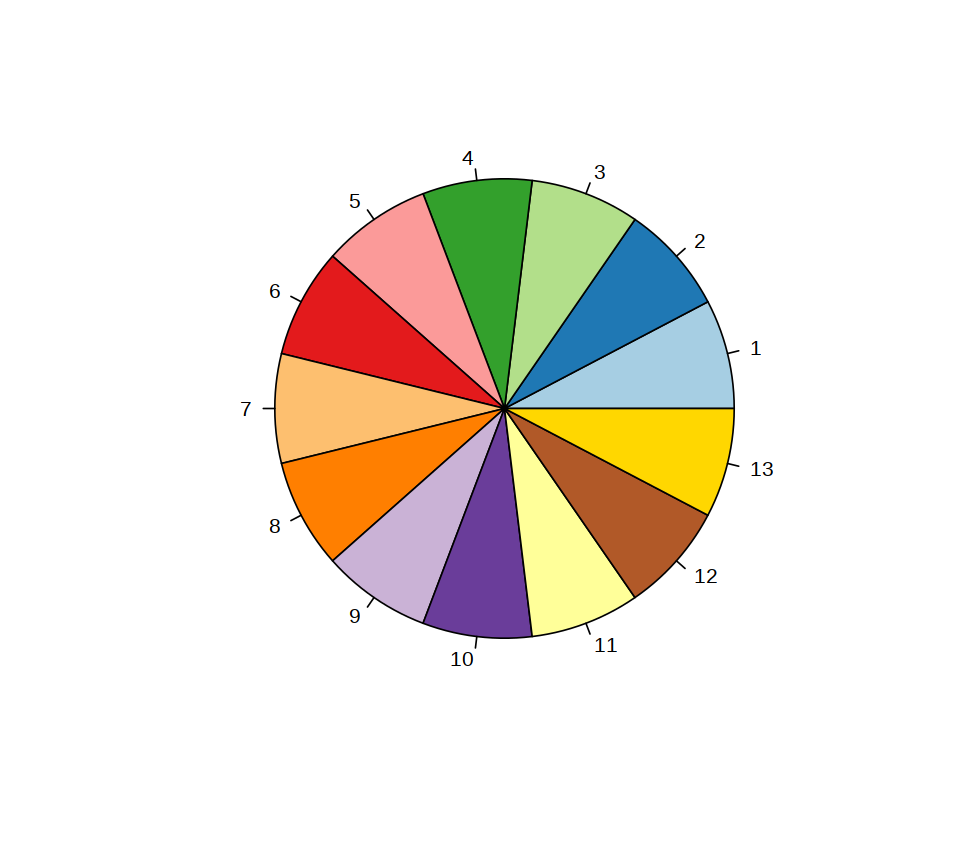

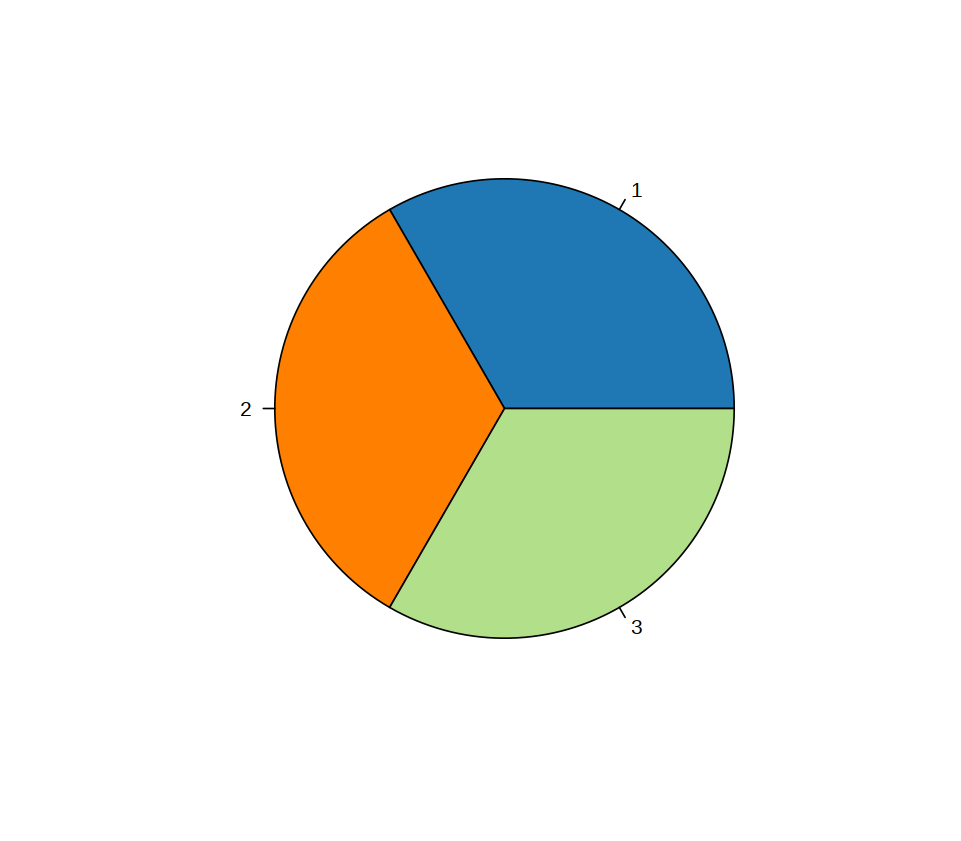

In [8]:
sampleColors0 <- RColorBrewer::brewer.pal(12, "Paired")
sampleColors0[13] <- "gold"
sampleColors0

options(repr.plot.width=8.01, repr.plot.height=7.01)
pie(rep(1,length(sampleColors0)), col=sampleColors0) 

sampleColors <- c(sampleColors0[2], sampleColors0[8], rep(sampleColors0[3], 18))
pie(rep(1,3), col=sampleColors) 


### epi

[1] "Epithelial cells" "Epi. Non-tumor"   "LEp_prog"         "LEp_secretory"   
 [5] "LEp"              "LEp_hormone"      "BEp"              "BEp_MaSCs"       
 [9] "BEp_myo"          "Epi. Unassigned"  "Epi. Tumor"       "Normal-like"     
[13] "NBL"              "Basal"            "CLow"             "Her2E"           
[17] "LumA"             "LumB"             "Keratinocytes"

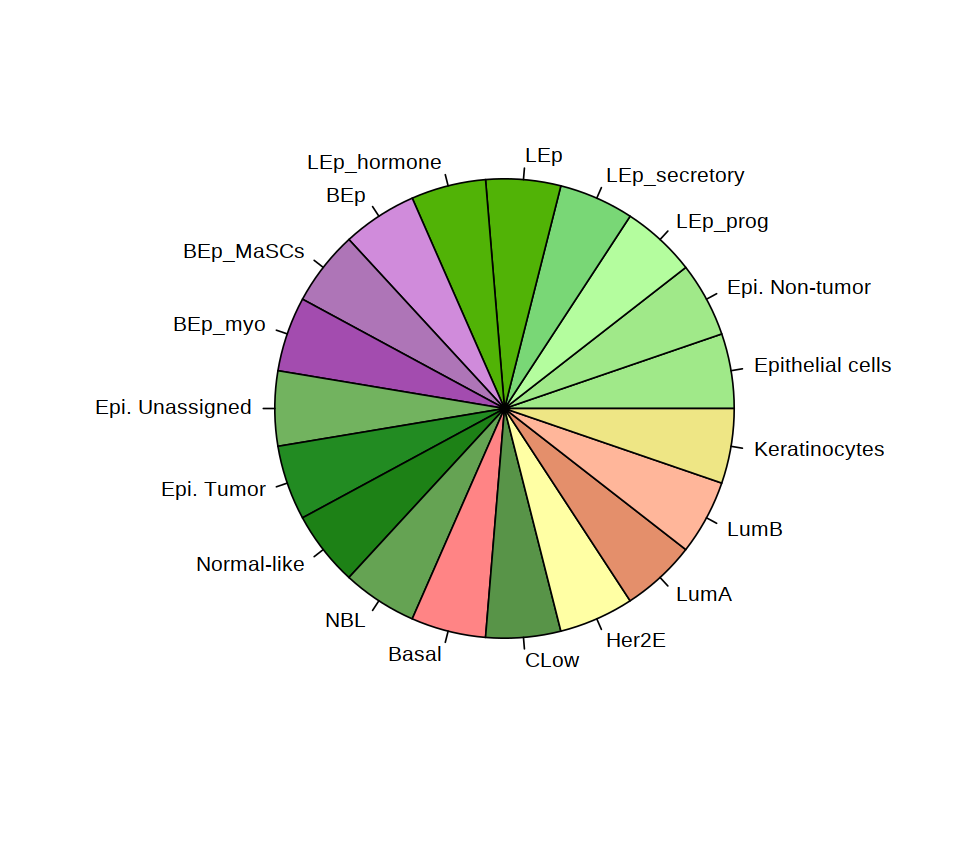

In [9]:
idx_epi <- grep(pattern_epi, names(nv_color))
names(nv_color)[idx_epi]

# http://applied-r.com/rcolorbrewer-palettes/
colors_epi <- RColorBrewer::brewer.pal(9, "Set1")
colors_epi <- colorspace::lighten(colors_epi, amount=0.4)

nv_color["Epi. Tumor"] <- "forestgreen"

nv_color["LEp_prog"] <- "#b4fd9e"
nv_color["LEp_secretory"] <- colors_epi[3]
color_lep_mature <- colorspace::darken(nv_color["LEp_prog"], amount=0.3)
nv_color["LEp"] <- color_lep_mature
nv_color["LEp_hormone"] <- color_lep_mature

nv_color["BEp"] <- colors_epi[4]
color_bep_mascs <- colorspace::darken(nv_color["BEp"], amount=0.15)
color_bep_myo <- colorspace::darken(nv_color["BEp"], amount=0.3)
nv_color["BEp_MaSCs"] <- color_bep_mascs
nv_color["BEp_myo"] <- color_bep_myo

nv_color["Basal"] <- colors_epi[1]
nv_color["Her2E"] <- colors_epi[6]
nv_color["Her2"] <- colors_epi[6]
nv_color["LumA"] <- colors_epi[7]
nv_color["LumB"] <- colors_epi[5]
nv_color["Normal-like"] <- colorspace::darken(colors_epi[3], amount=0.4)

pie(rep(1, length(idx_epi)), col=nv_color[idx_epi],
       labels=names(nv_color)[idx_epi]) 

      

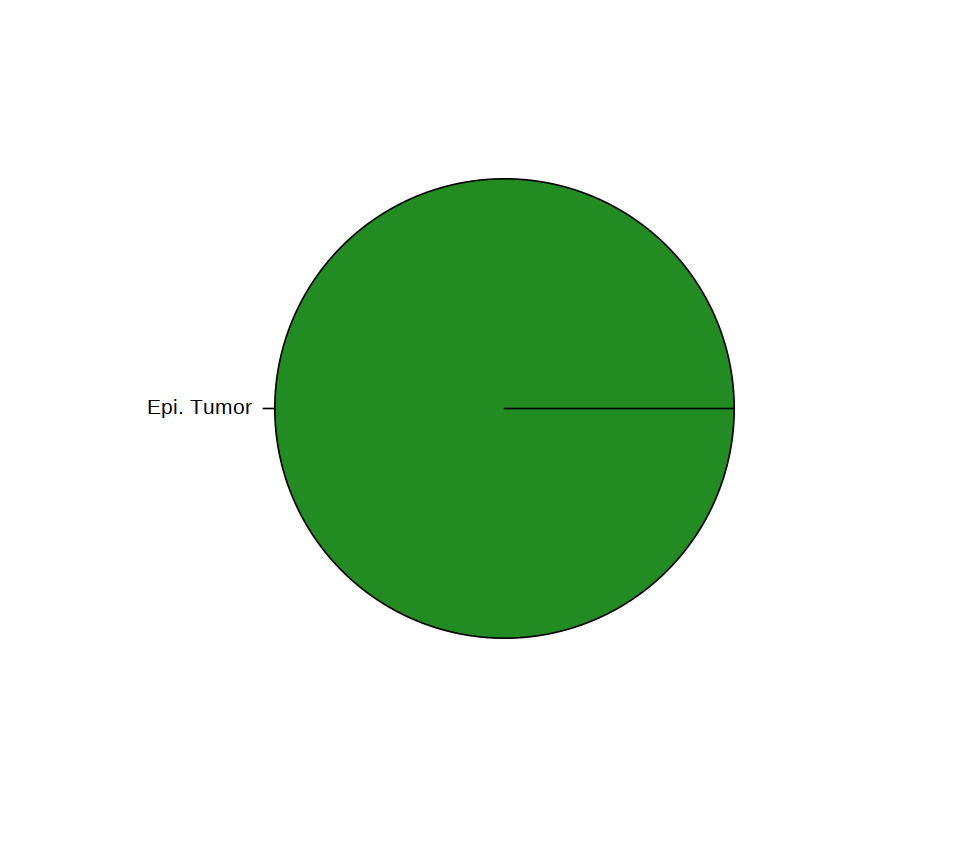

In [10]:
list_sort <- update_nv_color_cell_type(list_sort)

colors_epi <- list_sort$nv_color_cell_type

pie(rep(1, length(colors_epi)), col=colors_epi,
       labels=names(colors_epi)) 


### cell.type

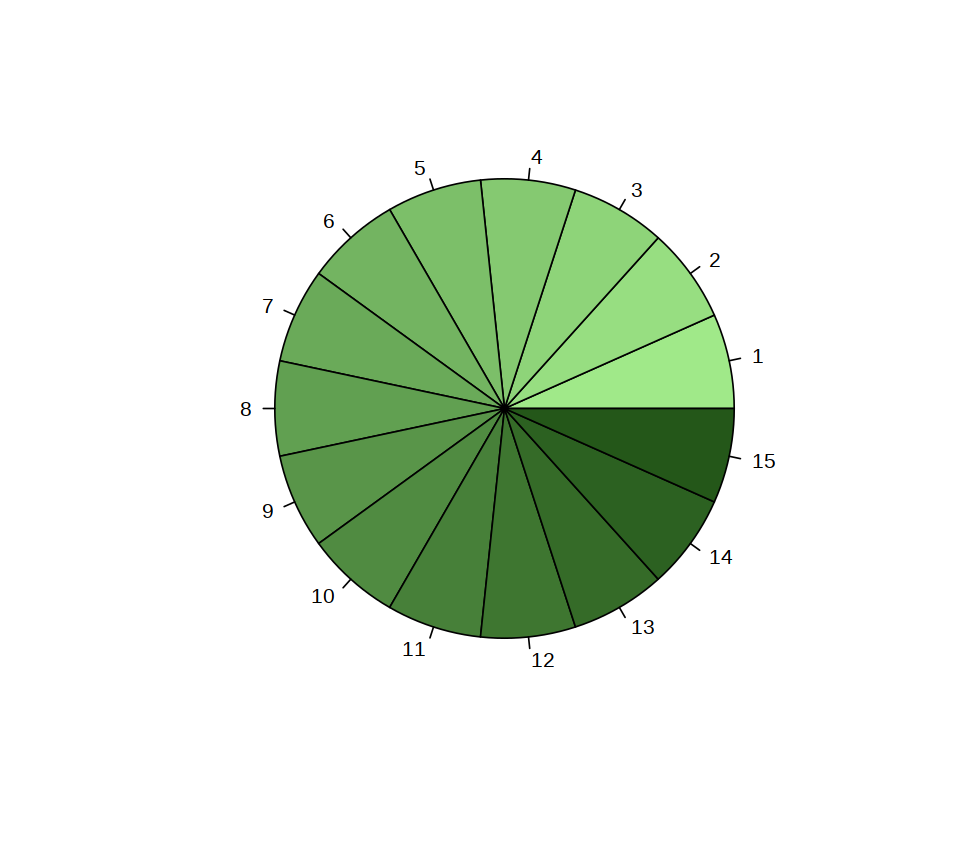

In [11]:
options(repr.plot.width=8.01, repr.plot.height=7.01)
pie(rep(1, length(list_sort$nv_color_cluster_type_ordered)),
    col=list_sort$nv_color_cluster_type_ordered) 


# samples

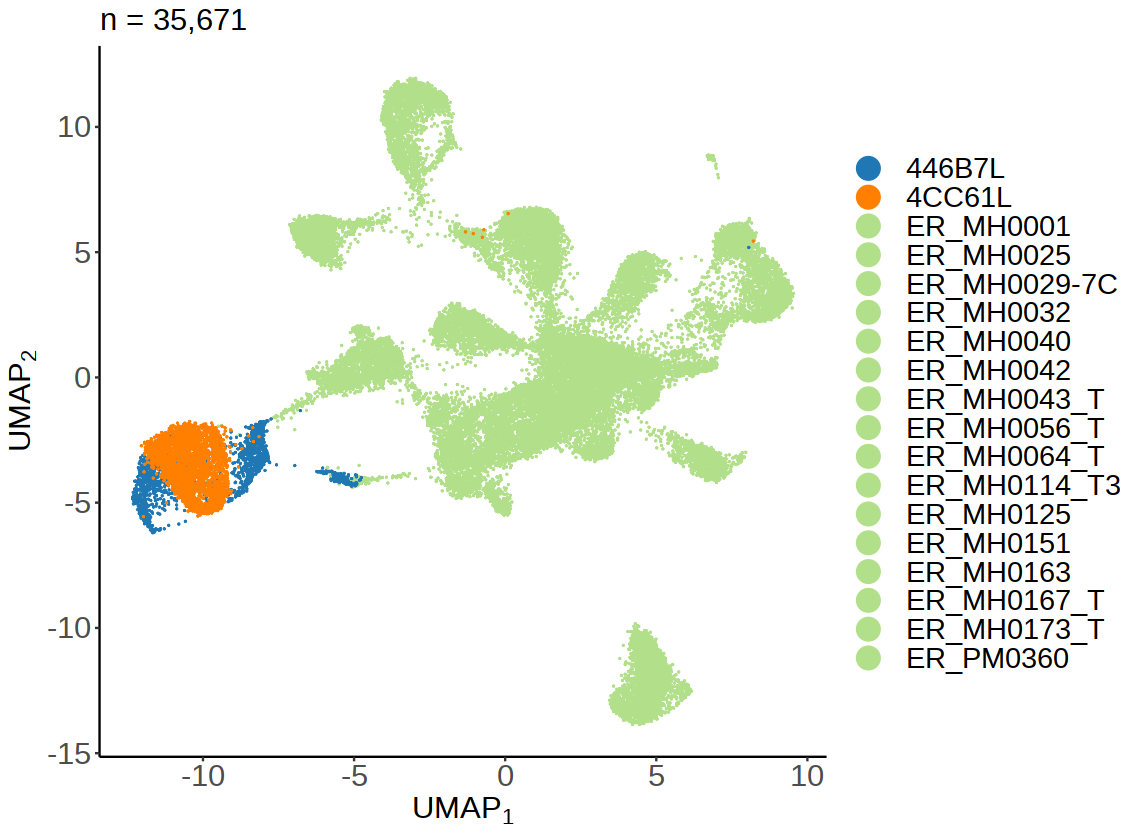

In [12]:
gg <- print_umap_samples(list_sort,
        colors_samples=sampleColors,
        legend.position="right",
        ncol=1, str_condition=str_condition)


# DGE

In [13]:
method_dge <- "seurat_findmarkers_enricher"
dir_xlsx <- "xlsx"


## pairs

In [14]:
sample1 <- "male-bc"
sample_ref <- "er+bc"

th_log2fc_=0.25; th_padj_=0.01
min.pct_=0.5; min.diff.pct_=0.25; max.cells.per.ident_=500
f_featureplot=TRUE
n_sampling=-1; cluster_rows=FALSE


In [15]:
cat(sprintf("sample1=%s\n", sample1))
cat(sprintf("sample_ref=%s\n", sample_ref))

    cat(sprintf("\t\tth_log2fc=%g\n", th_log2fc_))
    cat(sprintf("\t\tth_padj=%g\n", th_padj_))
    cat(sprintf("\t\tmin.pct=%g\n", min.pct_))
    cat(sprintf("\t\tmin.diff.pct=%g\n", min.diff.pct_))
    cat(sprintf("\t\tmax.cells.per.ident=%g\n", max.cells.per.ident_))
    cat(sprintf("\t\tmethod_dge=%s\n", method_dge))


sample1=male-bc
sample_ref=er+bc
		th_log2fc=0.25
		th_padj=0.01
		min.pct=0.5
		min.diff.pct=0.25
		max.cells.per.ident=500
		method_dge=seurat_findmarkers_enricher


### all cells

In [16]:

str_condition_tmp <- sprintf("%s_%s_vs_%s",
                             str_condition,
                             sample_ref, sample1)

list_markers <- find_markers(rna,
                        pattern_sample1 = "446B7L|4CC61L",
                        pattern_sample_ref = "ER_",
                        pattern_cell_type1 = NULL,
                        pattern_cell_type_ref = NULL,
                        group_name1 = "Male BC",
                        group_name_ref = "Female BC",
                        col_cell_types = "SingleR.BED",
                        th_log2fc = th_log2fc_,
                        th_padj = th_padj_, 
                        min.pct = min.pct_,
                        min.diff.pct = min.diff.pct_,
                        max.cells.per.ident = max.cells.per.ident_,
                        method_dge = method_dge,     
                        str_condition = str_condition_tmp)

head(list_markers$markers)
dim(list_markers$markers)


write.table(markers, file='tsv/male-bc_er+bc-epi_er+bc_vs_male-bc.tsv')

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,expr_min,expr_mean,expr_max
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPS4Y1,1.655515e-174,2.313585,0.948,0.000,4.144417e-170,0,1.459589,2.984242
TNFRSF12A,3.075781e-164,2.987610,0.997,0.270,7.699909e-160,0,2.620978,4.394236
ISG20,3.978188e-146,2.525560,0.945,0.118,9.958995e-142,0,1.751471,3.843429
S100A6,2.320176e-145,3.401509,1.000,0.574,5.808329e-141,0,4.662926,6.206801
LGALS3,2.298172e-142,2.358381,0.997,0.445,5.753244e-138,0,2.710801,4.376743
SLC3A2,1.997836e-141,2.358616,0.995,0.296,5.001382e-137,0,2.079425,4.490780


[1] 1018    8

In [17]:

list_ea <- execute_enrichment_analysis(list_markers$markers,
                        str_condition_tmp,
                        th_log2fc = th_log2fc_,
                        th_padj = th_padj_,
                        th_enricher_padj = 0.01,
                        th_enricher_qval = 0.01,
                        method_dge = method_dge,
                        dir_xlsx = dir_xlsx,       
                        n_log = 1)


seurat_findmarkers_enricher         col_log2fc=avg_log2FC         col_pvalue=p_val         col_padj=p_val_adj         th_log2fc=0.25         th_padj=0.01

df_up

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,expr_min,expr_mean,expr_max
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPS4Y1,1.655515e-174,2.313585,0.948,0.000,4.144417e-170,0,1.459589,2.984242
TNFRSF12A,3.075781e-164,2.987610,0.997,0.270,7.699909e-160,0,2.620978,4.394236
ISG20,3.978188e-146,2.525560,0.945,0.118,9.958995e-142,0,1.751471,3.843429
S100A6,2.320176e-145,3.401509,1.000,0.574,5.808329e-141,0,4.662926,6.206801
LGALS3,2.298172e-142,2.358381,0.997,0.445,5.753244e-138,0,2.710801,4.376743
SLC3A2,1.997836e-141,2.358616,0.995,0.296,5.001382e-137,0,2.079425,4.490780


[1] 1004    8

df_dn

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,expr_min,expr_mean,expr_max
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
XIST,9.451827e-80,-2.1678627,0.000,0.552,2.366170e-75,0,0.000320396,0.8784898
FOS,1.816296e-78,-3.2105937,0.129,0.700,4.546915e-74,0,0.118505794,4.7551218
TFF3,4.009161e-62,-3.6497283,0.272,0.699,1.003653e-57,0,0.226063191,3.9290797
PBX1,1.079076e-41,-1.7941054,0.228,0.552,2.701358e-37,0,0.132846291,1.8642010
HSPA1B,6.332088e-34,-1.8602724,0.333,0.593,1.585175e-29,0,0.233527966,4.0261982
DNAJC1,2.529566e-12,-0.2598369,0.634,0.312,6.332515e-08,0,0.480708621,2.2773122


[1] 14  8

up h

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,80/451,200/4386,3.658590e-30,1.792709e-28,1.463436e-28,PSMD8/RAN/C1QBP/PSMC4/PRDX4/NOP56/CCT5/EPRS/ILF2/CCT3/SLC25A3/ODC1/KPNA2/HDGF/GSPT1/CCT2/SSBP1/PSMA1/DDX21/IFRD1/EIF4G2/PSMD14/NPM1/GNL3/PSMC6/EIF2S1/EEF1B2/YWHAQ/NDUFAB1/PSMD1/SNRPA1/COPS5/EIF3D/PPM1G/PSMD7/CCT7/TCP1/HNRNPR/SRM/PSMB2/PSMD3/EXOSC7/MYC/EIF4H/AIMP2/HSPD1/ETF1/RSL1D1/PABPC4/VBP1/XRCC6/NOLC1/SRPK1/PGK1/SRSF7/EIF4A1/HPRT1/SSB/SNRPD1/NOP16/LDHA/CYC1/CNBP/NME1/UBA2/IARS/G3BP1/PSMB3/SYNCRIP/EIF1AX/PSMA7/CCT4/PHB/PTGES3/VDAC3/COX5A/EIF3B/PABPC1/SRSF2/SERBP1,80
HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,50/451,200/4386,7.583839e-10,1.858040e-08,1.516768e-08,TXNRD1/SQSTM1/PPA1/ENO1/PSMA3/PSMD12/PSMC4/CCT6A/EPRS/PSMD13/MAP2K3/ACTR3/TUBA4A/IFRD1/PSMD14/PSMC6/PSMC2/PSMG1/COPS5/TOMM40/ATP6V1D/NAMPT/UBE2D3/M6PR/HSPA9/RIT1/G6PD/HSPD1/HSPA5/ETF1/EEF1E1/GLRX/HSPA4/PGK1/IDI1/PNO1/HPRT1/GMPS/DDX39A/LDHA/PSMB5/ARPC5L/PITPNB/STIP1/UFM1/CACYBP/DDIT3/TES/PDAP1/HSP90B1,50
HALLMARK_MYC_TARGETS_V2,HALLMARK_MYC_TARGETS_V2,HALLMARK_MYC_TARGETS_V2,17/451,58/4386,4.305292e-05,6.334257e-04,5.170822e-04,NOP56/NPM1/GNL3/NIP7/SRM/MYC/MRTO4/AIMP2/HSPD1/MPHOSPH10/WDR43/NOLC1/IMP4/NOP16/WDR74/PHB/DCTPP1,17
HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,26/451,113/4386,5.203565e-05,6.334257e-04,5.170822e-04,NOP56/CEBPB/EIF4A3/STC2/ATP6V0D1/NPM1/EIF2S1/DKC1/DNAJC3/HSPA9/KIF5B/HSPA5/TARS/ATF4/SPCS3/NOLC1/EIF4A1/EIF4G1/YWHAZ/BAG3/CEBPG/IARS/DNAJB9/HERPUD1/HSP90B1/SPCS1,26
HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,33/451,161/4386,6.463528e-05,6.334257e-04,5.170822e-04,TNFRSF12A/ISG20/LGALS3/SAT1/HMOX1/SQSTM1/SOD2/VDAC2/BTG3/LMNA/PEA15/DNAJA1/GSN/DNAJC3/BCL10/CASP7/GADD45A/EMP1/CFLAR/IFNGR1/TIMP1/IER3/DAP3/ETF1/DNM1L/RELA/IRF1/PMAIP1/BID/CD44/DDIT3/BCAP31/SOD1,33
HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,14/451,49/4386,2.749644e-04,2.245543e-03,1.833096e-03,GCLM/TXNRD1/SOD2/PFKP/PRDX4/MGST1/GLRX2/PRNP/G6PD/GLRX/HMOX2/PRDX6/SOD1/PDLIM1,14


[1] 8 9

up c2

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
PENG_GLUTAMINE_DEPRIVATION_DN,PENG_GLUTAMINE_DEPRIVATION_DN,PENG_GLUTAMINE_DEPRIVATION_DN,105/932,337/21095,4.464845e-60,1.609577e-56,1.020805e-56,EMP3/MYL12B/PSMD8/UBE2M/LAMB3/PFKP/PSMA3/PPIF/CLIC1/C1QBP/PSMD6/PSMD12/STRAP/PRDX4/CCT6A/NOP56/CCT5/ILF2/ATP1B3/PPP2R2A/HRAS/ODC1/IFRD2/KPNA2/PSMD11/EIF5/AMD1/TUBB4B/GSPT1/EIF4A3/TUBA4A/CCT2/SSBP1/DDX21/EIF4G2/EBNA1BP2/CDC123/EIF2S1/PSMD1/MRPL3/DNAJA1/RRS1/SNRPA1/MANF/PSMB6/DNTTIP2/VCP/DKC1/TOMM40/RNF126/ZFP36L2/BAZ1A/TCP1/SRM/NUDC/PSMD3/UTP18/XRCC5/EXOSC7/AHSA1/SF3B4/ADRM1/HSPA5/EEF1E1/MPHOSPH10/PPIB/DNAJB6/TIMM17A/NOLC1/HSPA4/PRMT1/MTDH/IDI1/HPRT1/EIF4G1/SSB/GMPS/NOP16/LDHA/RABGGTB/PRPF40A/FKBP4/STIP1/NME1/G3BP1/MRPS12/PSMB3/MSMO1/SYNCRIP/EIF1AX/PHB/BZW1/COPS3/PGAM1/UBE2N/CYCS/CCDC6/GCSH/BCAP31/HNRNPAB/NCL/HSPA8/HSP90B1/ZNF593/SEC61B,105
PENG_RAPAMYCIN_RESPONSE_DN,PENG_RAPAMYCIN_RESPONSE_DN,PENG_RAPAMYCIN_RESPONSE_DN,83/932,245/21095,9.233238e-51,1.664291e-47,1.055505e-47,SLC3A2/EMP3/PSMD8/UBE2M/CD47/PSMA3/PPIF/C1QBP/CCT6A/NOP56/CCT5/TXNL1/GTF2A2/ATP1B3/PPP2R2A/PSMD11/AMD1/GSPT1/HCCS/CCT2/SSBP1/DDX21/EIF4G2/EBNA1BP2/PSMD14/EIF2S1/DNAJA1/SNRPA1/MANF/PSMC2/VCP/TOMM40/ARF1/SRM/RNH1/HSPA9/AHSA1/ADRM1/HSPA5/DAP3/TARS/ETF1/GARS/EEF1E1/PPIB/WDR43/TIMM17A/HSPA4/IMP4/CAPZA2/PRMT1/PGK1/MTDH/IDI1/EIF4G1/ATP6V0E1/NOP16/RABGGTB/PSMB5/PITPNB/AATF/PRPF40A/FKBP4/STIP1/NME1/RAB14/MRPS12/SYNCRIP/NAA10/CCNC/CCT4/PHB/PTGES3/PGAM1/CYCS/BCAP31/COPB2/RTN4/HSPA8/JTB/EIF3B/HSP90B1/ZNF593,83
PENG_LEUCINE_DEPRIVATION_DN,PENG_LEUCINE_DEPRIVATION_DN,PENG_LEUCINE_DEPRIVATION_DN,72/932,187/21095,1.345364e-48,1.616679e-45,1.025309e-45,EMP3/PSMA3/CCT6A/NOP56/CCT5/PSMD2/KPNA2/PSMD11/PSMA5/EIF5/AMD1/TUBB4B/GSPT1/MAP2K3/TUBA4A/CCT2/DDX21/EIF4G2/PSMD14/EIF2S1/PSMD1/MRPL3/DNAJA1/SNRPA1/YWHAH/MANF/TOMM40/RNF126/TCP1/SRM/PSMB7/PSMD3/XRCC5/TNFRSF1A/AHSA1/SF3B4/ADRM1/HSPA5/ETF1/PPIB/WDR43/DNAJB6/WDR1/TIMM17A/HSPA4/PRMT1/PGK1/IDI1/HPRT1/EIF4G1/SSB/NOP16/LDHA/PRPF40A/FKBP4/STIP1/COPS2/MRPS12/PSMA7/CCT4/PTGES3/PGAM1/UBE2N/CYCS/NUTF2/COPB2/NCL/HSPA8/EMD/HSP90B1/ZNF593/SEC61B,72
HSIAO_HOUSEKEEPING_GENES,HSIAO_HOUSEKEEPING_GENES,HSIAO_HOUSEKEEPING_GENES,90/932,389/21095,1.004179e-39,9.050168e-37,5.739679e-37,ISG20/LGALS3/ANXA2/SQSTM1/PSMD8/CD81/CAPN2/ENO1/S100A10/NDUFV2/MSN/YBX1/MYH9/CLIC1/C1QBP/GNAS/VDAC2/NFKBIA/GSTO1/FLNA/SLC25A3/PSMD2/PSMC1/EZR/CLTA/EIF4A3/IRAK1/RHOA/EIF4G2/NPM1/CSTB/EEF1B2/YWHAQ/PLP2/GSTP1/SLC6A8/ANXA11/YWHAH/PSMB6/HNRNPF/PSMD7/ARF1/PSMB4/HLA-E/PSMB2/UBE2D3/FNTA/TMBIM6/BUD31/RAC1/SLC25A5/PTP4A2/EIF4H/HSPD1/CAP1/CAST/ATF4/HLA-A/PGK1/EIF4A1/SARS/SSB/ESD/NDUFA12/ARF4/LDHA/PSMB5/PRDX6/YWHAZ/FKBP4/ITGB1/ARPC2/ANP32B/PSMB3/TPR/MDH1/YWHAB/CCT4/PGAM1/RPN2/VIM/BCAP31/NCL/SOD1/JUND/PABPC1/RPL36AL/ATP6V1F/PDLIM1/SEC61B,90
REN_ALVEOLAR_RHABDOMYOSARCOMA_DN,REN_ALVEOLAR_RHABDOMYOSARCOMA_DN,REN_ALVEOLAR_RHABDOMYOSARCOMA_DN,92/932,408/21095,1.278128e-39,9.215301e-37,5.844407e-37,TNFRSF12A/S100A6/ANXA2/RAB32/CD81/SH3BGRL3/FHL2/CLTB/S100A10/TM4SF1/ANXA5/CLIP1/DUSP14/MSN/MYH9/CLIC1/PRDX4/GNG12/GSTO1/PLAUR/ARPC3/RAP1B/STEAP1/LRRC59/SWAP70/FSTL3/DYNLT3/ID3/CLTA/CHMP2B/SPAG9/ASAP1/IRAK1/RHOA/ACTN1/ANXA7/IDS/PEA15/ATP6V0D1/CSTB/ADAM9/ARHGDIA/UBE2A/NQO2/TMEM165/ARF1/GSN/MCFD2/ZYX/EHD1/EMP1/RAC1/TNFRSF1A/TIMP1/RAB21/LEPROT/CAP1/STX12/PDXK/CAST/CTSB/UGDH/JAK1/GLRX/WDR1/ALG5/ACADVL/TMOD3/CYR61/ARPC5/TUSC3/VAT1/ABHD5/ATP6V0E1/PLEKHB2/ARF4/BAG3/LAMP2/ELOVL1/NPTN/B4GALT1/ACTN4/COQ10B/GRN/WDR45/TPM4/BCAP31/COPB2/REEP5/PDCD6/MCTS1/SEC61B,92
KARLSSON_TGFB1_TARGETS_UP,KARLSSON_TGFB1_TARGETS_UP,KARLSSON_TGFB1_TARGETS_UP,51/932,127/21095,9.028515e-36,5.424633e-33,3.440339e-33,TNFRSF12A/ANXA2/PPA1/MSN/CCT8/CCT3/UCHL3/GTPBP4/EIF5A/EIF5/ACTR3/MIR22HG/ACTN1/CCT2/DDX21/GNL3/EIF3A/EIF2S1/TOMM20/NAE1/PMEPA1/BAZ1A/NIP7/TCP1/SRM/UTP18/PELO/ZYX/HSPA9/MYC/MRTO4/TIMP1/GTF2F2/HSPD1/GARS/RSL1D1/EEF1E1/NOLC1/EIF4G1/ESD/SLTM/SYNCRIP/CACYBP/COQ10B/CD44/PLK2/TPM4/CYCS/GCSH/RPF2/EIF3B,51


[1] 787   9

up c5

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO_PROTEASOME_COMPLEX,GO_PROTEASOME_COMPLEX,GO_PROTEASOME_COMPLEX,37/897,76/17106,1.957090e-27,8.431143e-24,7.263894e-24,PSMD8/PSMA3/PSMD6/PSMD12/PSMC4/TXNL1/PSMB8/PSMD2/PSMC1/PSMD13/PSMD11/PSMA5/PSMA1/USP14/PSMD14/PSMB1/PSMC6/PSMD1/PSMC2/PSMB6/VCP/PSMC3/PSMD7/PSMC5/PSMB4/PSMB7/PSMB2/PSMD3/PSME2/ADRM1/UBQLN1/UBL4A/PSMG2/PSMB5/PSMB3/PSMA7/RAD23A,37
GO_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I,GO_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I,GO_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I,33/897,66/17106,4.359534e-25,9.390436e-22,8.090377e-22,PSMD8/PSMA3/PSMD6/PSMD12/PSMC4/PSMB8/PSMD2/PSMC1/PSMD13/PSMD11/PSMA5/HLA-C/HLA-B/PSMA1/PSMD14/PSMB1/PSMC6/PSMD1/PSMC2/PSMB6/PSMC3/PSMD7/PSMC5/PSMB4/PSMB7/HLA-E/PSMB2/PSMD3/PSME2/HLA-A/PSMB5/PSMB3/PSMA7,33
GO_REGULATION_OF_CELLULAR_AMINO_ACID_METABOLIC_PROCESS,GO_REGULATION_OF_CELLULAR_AMINO_ACID_METABOLIC_PROCESS,GO_REGULATION_OF_CELLULAR_AMINO_ACID_METABOLIC_PROCESS,32/897,66/17106,7.939880e-24,1.140167e-20,9.823164e-21,PSMD8/PSMA3/PSMD6/PSMD12/PSMC4/PSMB8/PSMD2/PSMC1/PSMD13/ODC1/PSMD11/PSMA5/PSMA1/PSMD14/PSMB1/PSMC6/PSMD1/PSMC2/PSMB6/PSMC3/PSMD7/PSMC5/PSMB4/PSMB7/PSMB2/PSMD3/PARK7/PSME2/AZIN1/PSMB5/PSMB3/PSMA7,32
GO_REGULATION_OF_RNA_STABILITY,GO_REGULATION_OF_RNA_STABILITY,GO_REGULATION_OF_RNA_STABILITY,44/897,139/17106,4.969120e-23,5.351743e-20,4.610821e-20,PSMD8/PSMA3/YBX1/PSMD6/PSMD12/PSMC4/PSMB8/PSMD2/PSMC1/PSMD13/PSMD11/PSMA5/PSMA1/PSMD14/PSMB1/PSMC6/PSMD1/PSMC2/PSMB6/DKC1/PSMC3/PSMD7/ZFP36L2/PSMC5/PSMB4/HNRNPR/PSMB7/PSMB2/PSMD3/EXOSC7/PSME2/CARHSP1/EIF4G1/PSMB5/YWHAZ/PSMB3/SYNCRIP/YWHAB/PSMA7/EXOSC8/YTHDF2/HSPA8/PABPC1/SERBP1,44
GO_INNATE_IMMUNE_RESPONSE_ACTIVATING_CELL_SURFACE_RECEPTOR_SIGNALING_PATHWAY,GO_INNATE_IMMUNE_RESPONSE_ACTIVATING_CELL_SURFACE_RECEPTOR_SIGNALING_PATHWAY,GO_INNATE_IMMUNE_RESPONSE_ACTIVATING_CELL_SURFACE_RECEPTOR_SIGNALING_PATHWAY,38/897,106/17106,3.016237e-22,2.598790e-19,2.239001e-19,PSMD8/PSMA3/PSMD6/PSMD12/PSMC4/NFKBIA/HRAS/PSMB8/PSMD2/PSMC1/PSMD13/KRAS/PSMD11/PSMA5/PSMA1/PSMD14/PSMB1/PSMC6/PSMD1/PSMC2/PSMB6/PSMC3/PSMD7/PSMC5/PSMB4/BCL10/PSMB7/PSMB2/PSMD3/PSME2/PAK2/RELA/UBE2D2/UBE2D1/PSMB5/PSMB3/PSMA7/UBE2N,38
GO_PROTEASOMAL_PROTEIN_CATABOLIC_PROCESS,GO_PROTEASOMAL_PROTEIN_CATABOLIC_PROCESS,GO_PROTEASOMAL_PROTEIN_CATABOLIC_PROCESS,59/897,271/17106,3.254276e-21,2.336570e-18,2.013084e-18,PSMD8/PSMA3/PSMD6/PSMD12/PSMC4/PPP2CB/RNF115/PSMB8/PSMD2/PSMC1/PSMD13/PSMD11/PSMA5/PSMA1/PSMD14/PSMB1/PSMC6/RBCK1/PSMD1/PSMC2/PSMB6/NSFL1C/VCP/UBE2A/RNF126/PSMC3/RNF6/PSMD7/PSMC5/DERL2/PSMB4/PSMB7/PSMB2/PSMD3/UBE2D3/PSME2/RNF187/UBE2J2/UBQLN1/HSPA5/FBXW5/PMAIP1/UBE2D1/PSMB5/STUB1/UBE2K/RNF7/PSMB3/UBE2B/CCDC47/DNAJB9/PSMA7/DDIT3/NFE2L2/RAD23A/UBXN4/FAF2/HSP90B1/SEC61B,59


[1] 246   9

up c6

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
CSR_EARLY_UP.V1_UP,CSR_EARLY_UP.V1_UP,CSR_EARLY_UP.V1_UP,36/550,164/11250,1.391240e-14,2.601620e-12,2.211340e-12,TNFRSF12A/PPIF/HMGA1/ILF2/PLAUR/GTPBP4/ID3/AMD1/MAP2K3/EIF4A3/IRAK1/ACTR3/MRPS35/DDX21/RIPK2/DNAJA1/DNTTIP2/KPNA4/DKC1/NIP7/FAM107B/MAPRE1/C8orf76/EIF4H/ADRM1/UGDH/EIF4A1/TFG/ITPRIPL2/NOP16/UFM1/SRP72/TOP1/UBE2N/CCDC59/NCL,36
CAMP_UP.V1_UP,CAMP_UP.V1_UP,CAMP_UP.V1_UP,37/550,200/11250,1.605580e-12,1.501217e-10,1.276014e-10,UPP1/ILF2/IFRD1/RBCK1/LIMS1/NQO2/MAGOH/ARF1/TYMP/HSPA9/MYC/SLC25A5/AZIN1/KIAA0040/HSPA5/DAP3/PPIB/ATF4/GLRX/SRPK1/PRMT1/CCDC124/MDH2/SAT2/OCIAD1/PMAIP1/AATF/NME1/CEBPG/UFM1/HAX1/TAF1D/RUVBL1/CNDP2/HSP90B1/SSR3/COPE,37
RB_DN.V1_DN,RB_DN.V1_DN,RB_DN.V1_DN,21/550,126/11250,7.102874e-07,4.427458e-05,3.763277e-05,S100A16/LAMB3/DUSP14/FLNA/LAMC2/TUBA4A/STC2/SERPINB1/MVP/ANXA11/FAM102A/GADD45A/PSME2/CAP1/HSPA5/ARL1/KRT7/MSMO1/CD44/DDIT3/PDCD6,21
EGFR_UP.V1_UP,EGFR_UP.V1_UP,EGFR_UP.V1_UP,25/550,193/11250,7.711135e-06,3.604956e-04,3.064162e-04,ISG20/SAT1/GCLM/SOD2/CAPN2/SDCBP/FADS3/MGLL/CEBPD/COTL1/EDN1/RHOQ/MIR22HG/ITGA2/CASP7/ADM/BACE2/GLRX/CYR61/CEACAM6/IRF1/PMAIP1/KRT7/DUSP5/ETHE1,25
CSR_LATE_UP.V1_UP,CSR_LATE_UP.V1_UP,CSR_LATE_UP.V1_UP,23/550,172/11250,1.047287e-05,3.916853e-04,3.329270e-04,ILF2/PSMD2/EIF5A/TUBA4A/PSMD14/SNRPA1/GTF3C6/PSMC3/SRM/NUDC/UTP18/MAPRE1/AHSA1/TIMP1/PDCL3/WSB2/EEF1E1/IMP4/HERC4/DCTPP1/COPS3/RPF2/EIF3B,23
RB_P107_DN.V1_DN,RB_P107_DN.V1_DN,RB_P107_DN.V1_DN,19/550,128/11250,1.373238e-05,4.279926e-04,3.637877e-04,S100A16/GNG12/HSD17B12/EDN1/SERPINB1/POMP/ANXA4/CAP1/TARS/GLRX/ACADVL/ARL1/DAD1/KRT7/IARS/ELOVL1/NFE2L2/RBM8A/PDCD6,19


[1] 15  9

down h

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HALLMARK_ESTROGEN_RESPONSE_LATE,HALLMARK_ESTROGEN_RESPONSE_LATE,HALLMARK_ESTROGEN_RESPONSE_LATE,3/5,200/4386,0.0008727446,0.006981957,0.004593392,FOS/TFF3/DNAJC1,3


[1] 1 9

down c2

down c5

down c6

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
CRX_NRL_DN.V1_UP,CRX_NRL_DN.V1_UP,CRX_NRL_DN.V1_UP,3/9,140/11250,0.0001499951,0.006299795,0.005526136,XIST/TFF3/HSPA1B,3
RAF_UP.V1_DN,RAF_UP.V1_DN,RAF_UP.V1_DN,3/9,194/11250,0.0003928822,0.008250526,0.007237303,FOS/TFF3/EIF2S3,3


[1] 2 9

filename_xlsx: xlsx/male-bc_er+bc-epi_er+bc_vs_male-bc.xlsx

### feature plot

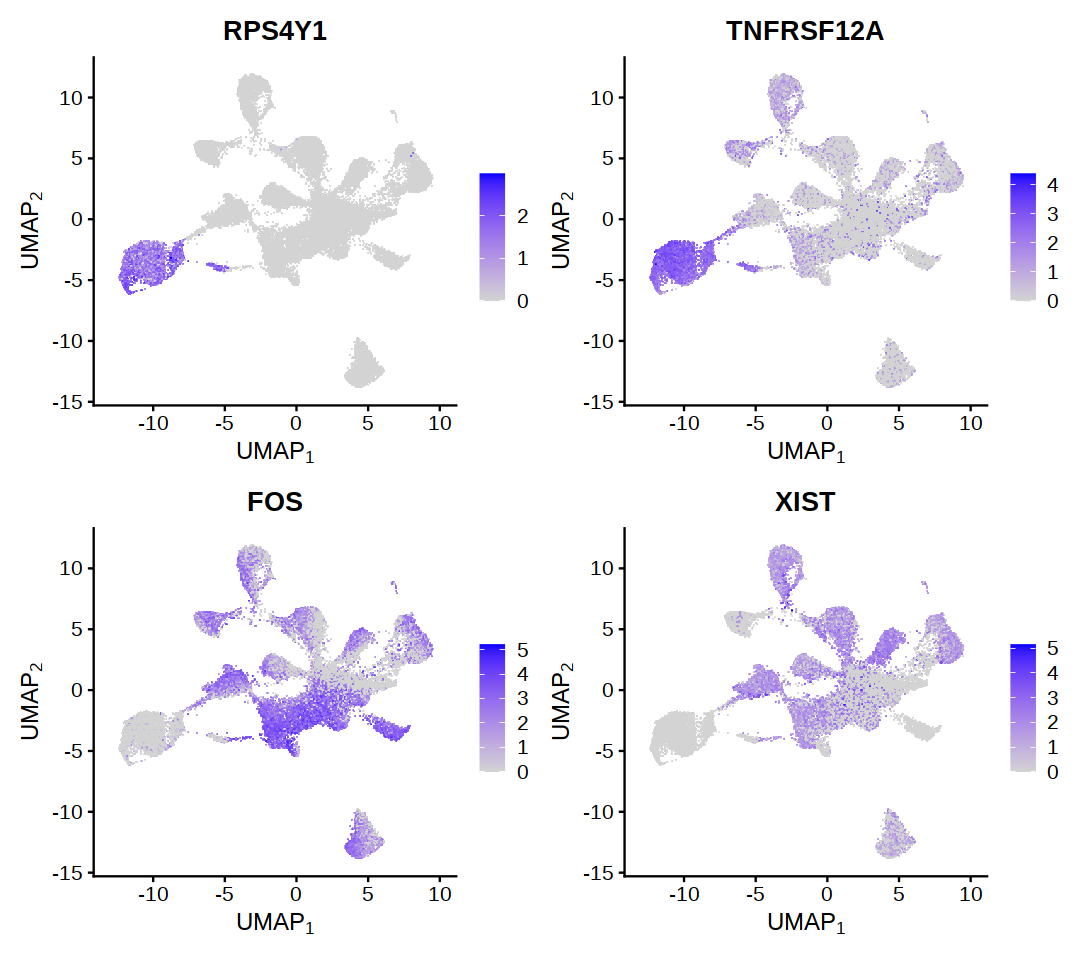

In [18]:

if (f_featureplot) {
    gg <- featureplot_enrichment_analysis(rna,
                list_ea,
                str_umap_reduction,
                str_condition_tmp)
}


### dotplot

In [19]:
df_up_h <- as.data.frame(list_ea[["up h"]])
df_up_h$type <- "up-regulated"

df_dn_h <- as.data.frame(list_ea[["down h"]])
df_dn_h$type <- "down-regulated"

df <- rbind(df_up_h, df_dn_h)

df$GeneRatio <- sapply(df$GeneRatio, function(x) eval(parse(text=x)))
df$Description <- gsub("_", " ", df$Description)
df$Description <- str_wrap(df$Description, 15)       
                

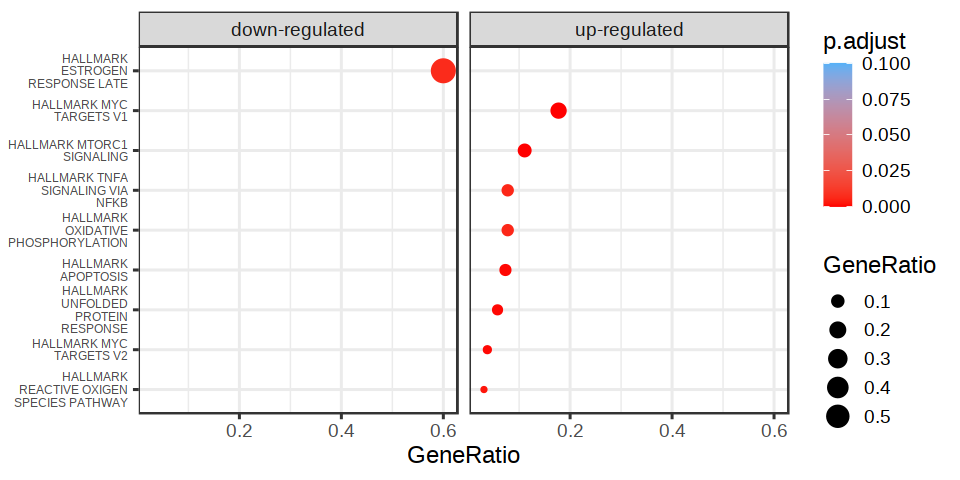

In [20]:
gg <- ggplot(df, aes(x = GeneRatio,
            y = forcats::fct_reorder(Description, GeneRatio))) + 
            geom_point(aes(size = GeneRatio, color = p.adjust)) +
            theme_bw(base_size = 14) +
        scale_colour_gradient(limits=c(0, 0.10), low="red") +
        ylab(NULL) +
        theme(
            axis.text.y=element_text(size=7, lineheight=0.9)
        )

gg <- gg + facet_grid(.~type)
print_figure(gg, width=8, height=4,
    file=sprintf("dotplot_%s", str_condition_tmp))


### heatmap

filename_figure: heatmap_male-bc_er+bc-epi_er+bc_vs_male-bc_zscore

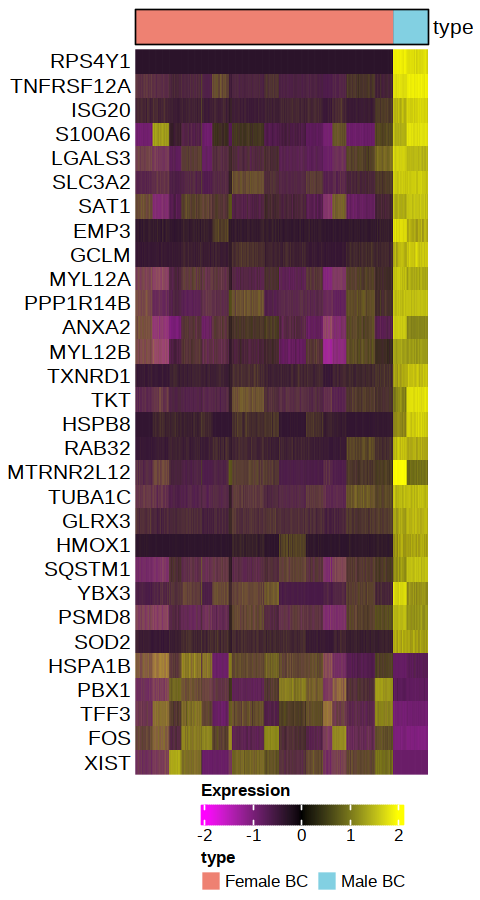

In [21]:

list_out_heatmap <- heatmap_enrichment_analysis(list_markers,
                    list_ea,
                    str_condition_tmp,
                    th_log2fc=0.25, th_padj=1e-12,
                    pattern_gene_removal=NULL,    
                    max_up=25, max_dn=25,
                    n_sampling=n_sampling,
                    cluster_rows=cluster_rows,
                    list_top_annotation_legend_param = list(type=list(title="type", ncol=2))
    )


# session info

In [22]:
writeLines(capture.output(sessionInfo()), "txt/sessionInfo.txt")


# reference

https://satijalab.org/seurat/
